# Понижение размерности данных с помощью метода главных компонент и сингулярного разложения
Группа: ИВТ-М20.<br/>
Студент: Архипов Дмитрий Алексеевич

In [145]:
from math import isnan
import matplotlib as mpl
from pprint import pprint
import matplotlib.pyplot as plt
from warnings import filterwarnings
from typing import (
    Any,
    Union
)
from pandas import (
    DataFrame,
    read_csv,
    Series,
    read_table,
    lreshape
)
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    RidgeClassifier
)
from sklearn.metrics import (
    classification_report,
    r2_score,
    mean_absolute_error
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)

In [2]:
filterwarnings('ignore')
mpl.style.use(['ggplot'])

## Прочтите данные из файлов

In [179]:
sop1: DataFrame = DataFrame(
    read_table(
        "data/train/SOP1.dat",
        sep="\s"
    )
)
sop1 = sop1.drop('0000', axis=1)
sop1.name = "SOP1"

In [187]:
sop2: DataFrame = DataFrame(
    read_table(
        "data/train/SOP2.dat",
        sep="\s",
        header=0
    )
)
sop2 = sop2.drop('0000', axis=1)
sop2.name = "SOP2"

In [188]:
sop3: DataFrame = DataFrame(
    read_table(
        "data/train/SOP3.dat",
        sep="\s",
        header=0
    )
)
sop3 = sop3.drop('0000', axis=1)
sop3.name = "SOP3"

In [5]:
target1: DataFrame = DataFrame(
    read_csv(
        "data/train/target1.csv",
        sep=",",
        header=0
    )
)
target1.name = "target1"

In [6]:
target2: DataFrame = DataFrame(
    read_csv(
        "data/train/target2.csv",
        sep=",",
        header=0
    )
)
target2.name = "target2"

In [7]:
target3: DataFrame = DataFrame(
    read_csv(
        "data/train/target3.csv",
        sep=",",
        header=0
    )
)
target3.name = "target3"

##  Отобразите несколько первых и несколько последних записей.

In [8]:
def printer(variable):
    pprint(variable.name)
    print(end="\n")
    pprint(variable.head())
    print(end="\n\n")
    pprint(variable.tail())
    print(end="\n\n\n\n")

In [186]:
printer(sop1)

'SOP1'

   29-08-03  12:34:21  +20C  Unnamed: 4  Unnamed: 5  257  Unnamed: 7  \
0         0        35   202          27          29   35           0   
1         0        23   190          27          22   29           0   
2         1         0   188          24          10   13           0   
3         5         0   183          26           6    1           0   
4         4         0   188          32           4    0           0   

   Unnamed: 8  325  Unnamed: 10  Unnamed: 11   16  Unnamed: 13  Unnamed: 14  \
0           0  255          147           54  119          125          212   
1           0  255          147           56   95          156          223   
2           0  255          145           59   40          172          254   
3           0  255          153           66   22          172          255   
4           0  255          157           62   18          170          255   

    5  ���1  
0  17    39  
1  13    27  
2  10     0  
3   7     0  
4  14    21  


In [171]:
sop1.shape

(1042, 17)

In [189]:
printer(sop2)

'SOP2'

   29-08-03  13:00:27  +23C  Unnamed: 4  Unnamed: 5  257  Unnamed: 7  \
0         0         0   175          12           0    0           0   
1         0         0   159          10          10    0           0   
2         0         0   139          25          48    0           0   
3         0         0   130          54          61    0           0   
4         0         0   110          54          57    0           0   

   Unnamed: 8  325  Unnamed: 10  Unnamed: 11  16  Unnamed: 13  Unnamed: 14  \
0           0  255          112            0   0          233          173   
1           0  255          108            0   0          222          173   
2           0  255          145            0   0          230          175   
3           0  255          216            0   1          237          185   
4           0  236          207            3   4          239          205   

    5  СОП2  
0   2    23  
1  10    34  
2  18    18  
3  52    22  
4  43    20  


    

In [190]:
printer(sop3)

'SOP3'

   29-08-03  13:49:13  +21C  Unnamed: 4  Unnamed: 5  257  Unnamed: 7  \
0         0         0     0          10         148   56           0   
1         0         0     0          28         129   55           0   
2         0         0     0          48          94   58          13   
3         0         0     0          54          68   51           0   
4         0         0     0          81          46   36           0   

   Unnamed: 8  325  Unnamed: 10  Unnamed: 11  16  Unnamed: 13  Unnamed: 14  \
0           3   39          118            0   4           88          154   
1           0   48          150            0   0           67          140   
2           0   16          210            0   0           47           98   
3           0   18          244            2   0           37           73   
4           0   16          255           11   0           41           58   

    5  ���3  
0  49    14  
1  54     5  
2  59    62  
3  29    12  
4  15     3  


    

In [14]:
printer(target1)

'target1'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0              51           42.0               7           L       A
1             200           40.0               6           L       B
2             278           39.0               4           L       A
3             365           43.0               6           L       B
4             460           27.0               5           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
3             365           43.0               6           L       B
4             460           27.0               5           L       A
5             845           36.0               4           L       B
6             959           62.0               6           L       A
7             141            NaN               4           T        






In [15]:
printer(target2)

'target2'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0             178           37.0               6           L       B
1             258           38.0               4           L       A
2             337           53.0               5           L       B
3             822           37.0               5           L       B
4             957           48.0               5           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
1             258           38.0               4           L       A
2             337           53.0               5           L       B
3             822           37.0               5           L       B
4             957           48.0               5           L       A
5             123            NaN               3           T        






In [16]:
printer(target3)

'target3'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0              26           42.0               5           L       A
1             172           47.0               6           L       B
2             276           55.0               8           L       B
3             795           34.0               8           L       B
4             877           49.0               4           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
2             276           55.0               8           L       B
3             795           34.0               8           L       B
4             877           49.0               4           L       A
5             971           50.0               5           L       B
6             112            NaN               4           T        






##  Ящик с усами.

array([[<AxesSubplot:title={'center':'29-08-03'}>,
        <AxesSubplot:title={'center':'12:34:21'}>,
        <AxesSubplot:title={'center':'+20C'}>,
        <AxesSubplot:title={'center':'Unnamed: 4'}>],
       [<AxesSubplot:title={'center':'Unnamed: 5'}>,
        <AxesSubplot:title={'center':'257'}>,
        <AxesSubplot:title={'center':'Unnamed: 7'}>,
        <AxesSubplot:title={'center':'Unnamed: 8'}>],
       [<AxesSubplot:title={'center':'325'}>,
        <AxesSubplot:title={'center':'Unnamed: 10'}>,
        <AxesSubplot:title={'center':'Unnamed: 11'}>,
        <AxesSubplot:title={'center':'16'}>],
       [<AxesSubplot:title={'center':'Unnamed: 13'}>,
        <AxesSubplot:title={'center':'Unnamed: 14'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'���1'}>]], dtype=object)

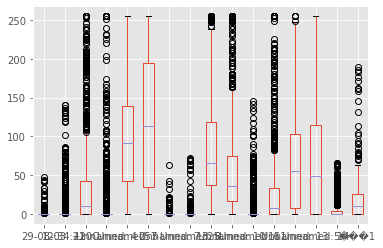

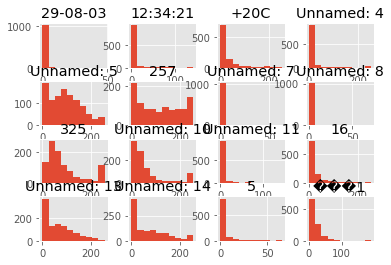

array([[<AxesSubplot:title={'center':'29-08-03'}>,
        <AxesSubplot:title={'center':'12:34:21'}>,
        <AxesSubplot:title={'center':'+20C'}>,
        <AxesSubplot:title={'center':'Unnamed: 4'}>],
       [<AxesSubplot:title={'center':'Unnamed: 5'}>,
        <AxesSubplot:title={'center':'257'}>,
        <AxesSubplot:title={'center':'Unnamed: 7'}>,
        <AxesSubplot:title={'center':'Unnamed: 8'}>],
       [<AxesSubplot:title={'center':'325'}>,
        <AxesSubplot:title={'center':'Unnamed: 10'}>,
        <AxesSubplot:title={'center':'Unnamed: 11'}>,
        <AxesSubplot:title={'center':'16'}>],
       [<AxesSubplot:title={'center':'Unnamed: 13'}>,
        <AxesSubplot:title={'center':'Unnamed: 14'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'���1'}>]], dtype=object)

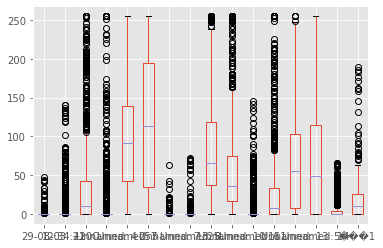

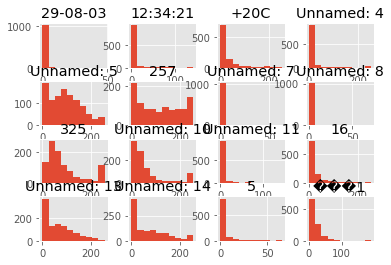

In [192]:
sop1.boxplot()
sop1.hist()

array([[<AxesSubplot:title={'center':'29-08-03'}>,
        <AxesSubplot:title={'center':'13:00:27'}>,
        <AxesSubplot:title={'center':'+23C'}>,
        <AxesSubplot:title={'center':'Unnamed: 4'}>],
       [<AxesSubplot:title={'center':'Unnamed: 5'}>,
        <AxesSubplot:title={'center':'257'}>,
        <AxesSubplot:title={'center':'Unnamed: 7'}>,
        <AxesSubplot:title={'center':'Unnamed: 8'}>],
       [<AxesSubplot:title={'center':'325'}>,
        <AxesSubplot:title={'center':'Unnamed: 10'}>,
        <AxesSubplot:title={'center':'Unnamed: 11'}>,
        <AxesSubplot:title={'center':'16'}>],
       [<AxesSubplot:title={'center':'Unnamed: 13'}>,
        <AxesSubplot:title={'center':'Unnamed: 14'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'СОП2'}>]], dtype=object)

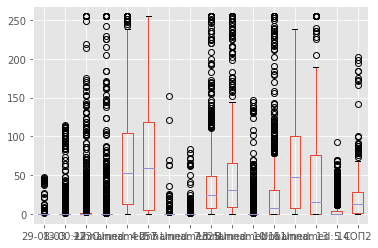

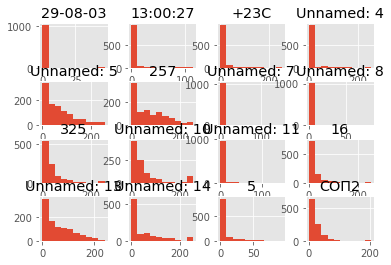

In [193]:
sop2.boxplot()
sop2.hist()

array([[<AxesSubplot:title={'center':'29-08-03'}>,
        <AxesSubplot:title={'center':'13:49:13'}>,
        <AxesSubplot:title={'center':'+21C'}>,
        <AxesSubplot:title={'center':'Unnamed: 4'}>],
       [<AxesSubplot:title={'center':'Unnamed: 5'}>,
        <AxesSubplot:title={'center':'257'}>,
        <AxesSubplot:title={'center':'Unnamed: 7'}>,
        <AxesSubplot:title={'center':'Unnamed: 8'}>],
       [<AxesSubplot:title={'center':'325'}>,
        <AxesSubplot:title={'center':'Unnamed: 10'}>,
        <AxesSubplot:title={'center':'Unnamed: 11'}>,
        <AxesSubplot:title={'center':'16'}>],
       [<AxesSubplot:title={'center':'Unnamed: 13'}>,
        <AxesSubplot:title={'center':'Unnamed: 14'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'���3'}>]], dtype=object)

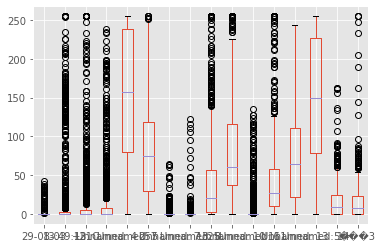

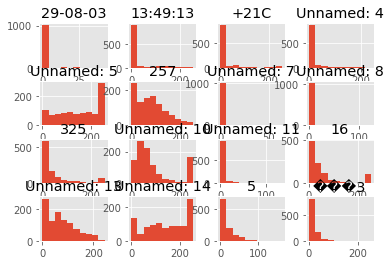

In [194]:
sop3.boxplot()
sop3.hist()


## Вектор с результатами наличия дефектов

In [35]:
array1 = [0] * sop1.count()[0]
array2 = [0] * sop2.count()[0]
array3 = [0] * sop3.count()[0]

ser1: Series = Series(data=array1)
ser2: Series = Series(data=array2)
ser3: Series = Series(data=array3)

serH1: Series = Series(data=array1)
serH2: Series = Series(data=array2)
serH3: Series = Series(data=array3)


In [29]:
def defects(target, series):
    for index, row in target.iterrows():
        begin = row['Начало дефекта']
        end = row['Начало дефекта'] + row['Длина дефекта']
        if not isnan(end):
            series.loc[begin:int(end)] = 1
    return series

In [44]:
ser1 = defects(target1, ser1)
ser2 = defects(target2, ser2)
ser3 = defects(target2, ser3)

## Вектор, содержащий значения высоты дефектов в местах их наличия

In [23]:
def defects_height(target, series):
    for index, row in target.iterrows():
        begin = row['Начало дефекта']
        end = row['Начало дефекта'] + row['Длина дефекта']
        if not isnan(end):
            series.loc[begin:int(end)] = row['Высота дефекта']
    return series

In [37]:
serH1 = defects_height(target1, ser1)
serH2 = defects_height(target2, ser2)
serH3 = defects_height(target3, ser3)


## Разбиение данных на обучающую и проверочную выборки

In [195]:
sop_train1, sop_test1, target_train1, target_test1 = train_test_split(sop1, ser1, test_size=0.3, train_size=0.7)
sop_train2, sop_test2, target_train2, target_test2 = train_test_split(sop2, ser2, test_size=0.3, train_size=0.7)
sop_train3, sop_test3, target_train3, target_test3 = train_test_split(sop3, ser3, test_size=0.3, train_size=0.7)

## Последовательное применение алгоритмов

In [196]:
def algorithms(sop_train: object, target_train: object) -> object:
    lr: LogisticRegression = LogisticRegression()
    lr.fit(sop_train, target_train)

    sgdc: SGDClassifier = SGDClassifier()
    sgdc.fit(sop_train, target_train)

    rc: RidgeClassifier = RidgeClassifier()
    rc.fit(sop_train, target_train)

    return lr, sgdc, rc

In [197]:
lr1, sgdc1, rc1 = algorithms(sop_train1, target_train1)

In [198]:
lr2, sgdc2, rc2 = algorithms(sop_train2, target_train2)

In [199]:
lr3, sgdc3, rc3 = algorithms(sop_train3, target_train3)

## Оценка качества модели

In [146]:
def estimate(classifier: object, target_test: object, sop_test: object) -> None:
    pred: object = classifier.predict(sop_test)
    print(f"r2_score: {round(r2_score(target_test, pred), 3)}")
    print(f"mean_absolute_error: {round(mean_absolute_error(target_test, pred), 3)}")
    print(f"classification_report: {classification_report(target_test, pred)}", end='\n')

### LogisticRegression

In [200]:
estimate(
    classifier=lr1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: 0.043
mean_absolute_error: 0.182
classification_report:               precision    recall  f1-score   support

           0       0.83      0.94      0.89       233
           1       0.73      0.45      0.56        80

    accuracy                           0.82       313
   macro avg       0.78      0.70      0.72       313
weighted avg       0.81      0.82      0.80       313



In [201]:
estimate(
    classifier=lr2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.057
mean_absolute_error: 0.176
classification_report:               precision    recall  f1-score   support

           0       0.84      0.97      0.90       246
           1       0.70      0.29      0.41        66

    accuracy                           0.82       312
   macro avg       0.77      0.63      0.65       312
weighted avg       0.81      0.82      0.79       312



In [202]:
estimate(
    classifier=lr3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.284
mean_absolute_error: 1.163
classification_report:               precision    recall  f1-score   support

           0       0.69      0.92      0.79       185
           1       0.60      0.31      0.41        68
           4       0.57      0.38      0.46        21
           5       0.78      0.41      0.54        17
           6       0.00      0.00      0.00         5
           8       0.17      0.06      0.09        16

    accuracy                           0.66       312
   macro avg       0.47      0.35      0.38       312
weighted avg       0.63      0.66      0.62       312



### SGDClassifier

In [203]:
estimate(
    classifier=sgdc1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.427
mean_absolute_error: 0.272
classification_report:               precision    recall  f1-score   support

           0       0.86      0.76      0.81       233
           1       0.48      0.64      0.55        80

    accuracy                           0.73       313
   macro avg       0.67      0.70      0.68       313
weighted avg       0.76      0.73      0.74       313



In [204]:
estimate(
    classifier=sgdc2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.268
mean_absolute_error: 0.212
classification_report:               precision    recall  f1-score   support

           0       0.82      0.93      0.87       246
           1       0.50      0.26      0.34        66

    accuracy                           0.79       312
   macro avg       0.66      0.59      0.61       312
weighted avg       0.76      0.79      0.76       312



In [205]:
estimate(
    classifier=sgdc3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.236
mean_absolute_error: 1.452
classification_report:               precision    recall  f1-score   support

           0       0.77      0.55      0.64       185
           1       0.32      0.41      0.36        68
           4       0.00      0.00      0.00        21
           5       0.17      0.94      0.29        17
           6       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        16

    accuracy                           0.46       312
   macro avg       0.21      0.32      0.21       312
weighted avg       0.53      0.46      0.47       312



### RidgeClassifier

In [206]:
estimate(
    classifier=rc1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.041
mean_absolute_error: 0.198
classification_report:               precision    recall  f1-score   support

           0       0.81      0.95      0.88       233
           1       0.72      0.36      0.48        80

    accuracy                           0.80       313
   macro avg       0.77      0.66      0.68       313
weighted avg       0.79      0.80      0.78       313



In [207]:
estimate(
    classifier=rc2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.23
mean_absolute_error: 0.205
classification_report:               precision    recall  f1-score   support

           0       0.80      0.98      0.88       246
           1       0.58      0.11      0.18        66

    accuracy                           0.79       312
   macro avg       0.69      0.54      0.53       312
weighted avg       0.76      0.79      0.73       312



In [208]:
estimate(
    classifier=rc3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.272
mean_absolute_error: 1.205
classification_report:               precision    recall  f1-score   support

           0       0.64      0.97      0.77       185
           1       0.62      0.26      0.37        68
           4       0.00      0.00      0.00        21
           5       0.50      0.06      0.11        17
           6       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        16

    accuracy                           0.63       312
   macro avg       0.29      0.22      0.21       312
weighted avg       0.54      0.63      0.54       312



## Подбор гиперпараметров

In [78]:
def hyperparameters(sop_train: object, target_train: object) -> object:
    print("LogisticRegression")
    parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
    grid: GridSearchCV = GridSearchCV(
        LogisticRegression(),
        parameters,
        cv=5
    )
    lr_grid: Union[GridSearchCV, Any] = grid.fit(sop_train, target_train)
    print(lr_grid, end="\n\n\n")

    print("SGDClassifier")
    parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
        'alpha': [10 ** x for x in range(-6, 1)],
        'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
    }
    grid: GridSearchCV = GridSearchCV(
        SGDClassifier(),
        parameters,
        cv=5
    )
    sgdc_grid: Union[GridSearchCV, Any] = grid.fit(sop_train, target_train)
    print(sgdc_grid, end="\n\n\n")

    print("RidgeClassifier")
    parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
        'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }
    grid: GridSearchCV = GridSearchCV(
        RidgeClassifier(),
        parameters,
        cv=5
    )
    rc_grid: Union[GridSearchCV, Any] = grid.fit(sop_train, target_train)
    print(rc_grid, end="\n\n\n")

    return lr_grid, sgdc_grid, rc_grid

In [209]:
lr_grid1, sgdc_grid1, rc_grid1 = hyperparameters(
    sop_train=sop_train1,
    target_train=target_train1
)

LogisticRegression
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})


SGDClassifier
GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95,
                                      1]})


RidgeClassifier
GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]})




In [210]:
lr_grid2, sgdc_grid2, rc_grid2 = hyperparameters(
    sop_train=sop_train2,
    target_train=target_train2
)

LogisticRegression
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})


SGDClassifier
GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95,
                                      1]})


RidgeClassifier
GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]})




In [211]:
lr_grid3, sgdc_grid3, rc_grid3 = hyperparameters(
    sop_train=sop_train3,
    target_train=target_train3
)

LogisticRegression
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})


SGDClassifier
GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95,
                                      1]})


RidgeClassifier
GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]})




## Заново обучите модель с подобранными гиперпараметрам

In [156]:
def relearn(classifier: object, target_test: object, sop_test: object) -> None:
    pred: object = classifier.predict(sop_test)
    print(f"r2_score: {round(r2_score(target_test, pred), 3)}")
    print(f"mean_absolute_error: {round(mean_absolute_error(target_test, pred), 3)}")
    print(f"classification_report: {classification_report(target_test, pred)}", end='\n')

### LogisticRegression

In [212]:
relearn(
    classifier=lr_grid1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: 0.026
mean_absolute_error: 0.185
classification_report:               precision    recall  f1-score   support

           0       0.83      0.94      0.88       233
           1       0.73      0.44      0.55        80

    accuracy                           0.81       313
   macro avg       0.78      0.69      0.72       313
weighted avg       0.80      0.81      0.80       313



In [213]:
relearn(
    classifier=lr_grid2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.095
mean_absolute_error: 0.183
classification_report:               precision    recall  f1-score   support

           0       0.83      0.97      0.89       246
           1       0.70      0.24      0.36        66

    accuracy                           0.82       312
   macro avg       0.76      0.61      0.63       312
weighted avg       0.80      0.82      0.78       312



In [214]:
relearn(
    classifier=lr_grid3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.271
mean_absolute_error: 1.144
classification_report:               precision    recall  f1-score   support

           0       0.69      0.92      0.79       185
           1       0.64      0.34      0.44        68
           4       0.57      0.38      0.46        21
           5       0.80      0.47      0.59        17
           6       0.00      0.00      0.00         5
           8       0.17      0.06      0.09        16

    accuracy                           0.67       312
   macro avg       0.48      0.36      0.40       312
weighted avg       0.64      0.67      0.63       312



### SGDClassifier

In [215]:
relearn(
    classifier=sgdc_grid1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.343
mean_absolute_error: 0.256
classification_report:               precision    recall  f1-score   support

           0       0.86      0.79      0.82       233
           1       0.50      0.62      0.56        80

    accuracy                           0.74       313
   macro avg       0.68      0.71      0.69       313
weighted avg       0.77      0.74      0.75       313



In [216]:
relearn(
    classifier=sgdc_grid2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.134
mean_absolute_error: 0.189
classification_report:               precision    recall  f1-score   support

           0       0.81      1.00      0.89       246
           1       1.00      0.11      0.19        66

    accuracy                           0.81       312
   macro avg       0.90      0.55      0.54       312
weighted avg       0.85      0.81      0.74       312



In [217]:
relearn(
    classifier=sgdc_grid3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.369
mean_absolute_error: 1.253
classification_report:               precision    recall  f1-score   support

           0       0.67      0.90      0.76       185
           1       0.55      0.25      0.34        68
           4       0.50      0.24      0.32        21
           5       0.64      0.41      0.50        17
           6       0.00      0.00      0.00         5
           8       0.18      0.12      0.15        16

    accuracy                           0.63       312
   macro avg       0.42      0.32      0.35       312
weighted avg       0.59      0.63      0.58       312



### RidgeClassifier

In [218]:
relearn(
    classifier=rc_grid1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.041
mean_absolute_error: 0.198
classification_report:               precision    recall  f1-score   support

           0       0.81      0.95      0.88       233
           1       0.72      0.36      0.48        80

    accuracy                           0.80       313
   macro avg       0.77      0.66      0.68       313
weighted avg       0.79      0.80      0.78       313



In [219]:
relearn(
    classifier=rc_grid2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.23
mean_absolute_error: 0.205
classification_report:               precision    recall  f1-score   support

           0       0.80      0.98      0.88       246
           1       0.58      0.11      0.18        66

    accuracy                           0.79       312
   macro avg       0.69      0.54      0.53       312
weighted avg       0.76      0.79      0.73       312



In [220]:
relearn(
    classifier=rc_grid3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.272
mean_absolute_error: 1.205
classification_report:               precision    recall  f1-score   support

           0       0.64      0.97      0.77       185
           1       0.62      0.26      0.37        68
           4       0.00      0.00      0.00        21
           5       0.50      0.06      0.11        17
           6       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        16

    accuracy                           0.63       312
   macro avg       0.29      0.22      0.21       312
weighted avg       0.54      0.63      0.54       312



# Ответы на контрольные вопросы

### 1. Что такое система ПУЗК? Какие основные методы УЗК реализуются в данной системе?

Система ПУЗК - это система полуавтоматического ультразвукового контроля. Она предназначена для выявления продольных и поперечных дефектов, для определения координат и условных размеров дефекта и проведения эксплуатационного контроля.

В состав системы входят 8 преобразователей, располагающихся по обе стороны сварного шва. Часть из них является генераторами, а часть приемниками (усилителями) акустического сигнала, два преобразователя совмещают упомянутые выше функции.

В данной системе реализуются эхо-метод, теневой метод и эхо-контактный.

При эхо-методе преобразователи располагаются с одной стороны сварного соединения. Метод основан на том, что генератор излучает ультразвуковую волну, которая отражается от дефекта и принимается усилителем. В отсутствие дефекта сигнал на приемнике отсутствует.

При теневом методе генератор и приемник располагаются с разных сторон шва. Если дефекта нет, волна без потерь проходит от генератора к приемнику. При наличии дефекта сигнал на приемнике ослаблен из-за рассеивания ультразвуковой волны на дефекте.

При эхо-контактном методе преобразователь генерирует колебания (то есть выступает в роли генератора) и он же принимает отражённые от дефектов эхо-сигналы (как приёмник).

### 2. Чем отличается эхо-метод от теневого и эхо-контактного метода УЗК?

При теневом методе генератор и приемник располагаются с разных сторон шва. Если дефекта нет, волна без потерь проходит от генератора к приемнику. При наличии дефекта сигнал на приемнике ослаблен из-за рассеивания ультразвуковой волны на дефекте.

О наличии дефекта судят по уменьшению амплитуды УЗ-колебаний, прошедших от излучателя к приемнику. Чем больше размер дефекта, тем меньше амплитуда прошедшего сигнала. Можно применять только при двустороннем доступе к изделию.

### 3. Какие типы дефектов можно найти с помощью системы ПУЗК?

С помощью ПУЗК можно выявлять продольные и поперечные дефекты.

Продольные дефекты - дефекты (трещины), расположенные вдоль оси сварного шва.

Поперечные дефекты - дефекты, расположенные перпендикулярно оси сварного шва.

В идеале амплитуда эхо-сигнала при отсутствии дефекта должна равняться нулю, а амплитуда теневого сигнала – 255 усл.ед. При наличии дефекта должно наблюдаться обратное соотношение сигналов по эхо и теневым тактам.


